<a href="https://colab.research.google.com/github/SlinkyShelf/3BodyProblemAI/blob/main/3BodyProblemAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Packages

Most are already installed :)

# Creating DataBase

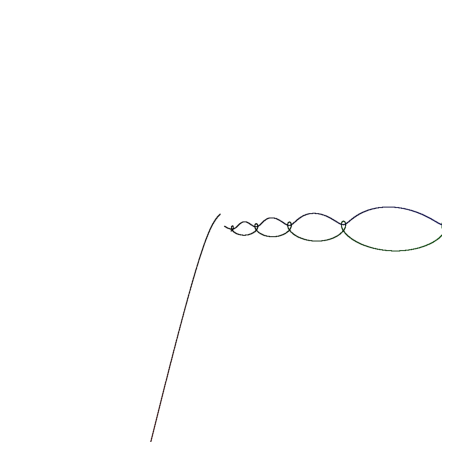

In [273]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt
import PIL
from PIL import Image, ImageDraw
import math
import time

# Dataset Variables
sampleCount = 1
objects = 3

gravityConstant = 1000

setFrames = 3000

timeStep = .05
timeRange = 1
frameRange = [setFrames, setFrames]

positionRange = 50
velocityRange = 5

setMass = 1

class orbitObject():
  def __init__(self, x, y, vx, vy, mass, xa, ya):
    self.x = x
    self.y = y
    self.vx = vx
    self.vy = vy
    self.mass = mass
    self.xa = xa
    self.ya = ya

  def dup(self):
    return orbitObject(self.x, self.y, self.vx, self.vy, self.mass, self.xa, self.ya)
    
samples = []

# rd.seed(4)

# Random functions
def normalRand():
  return (rd.random()-.5)*2

def randRange(_range):
  return _range[0] + rd.random() * (_range[1] - _range[0])

def simulate(sample):

  # Creating manipulatable objects
  objects1 = []
  objects2 = []
  sample["frameData"] = []
  sample["frameData"].append([])
  for obj in sample["objects"]:
    objects1.append(obj.dup())
    objects2.append(obj.dup())
    sample["frameData"][0].append(obj.dup())


  # Actual simulation
  for i in range(1, sample["frames"]):
    sample["frameData"].append([])
    for j in range(objects):
        xa = 0
        ya = 0

        obj1 = objects1[j]
        obj2 = objects2[j]

        for obj in objects1:
          if (obj1 == obj):
            continue

          force = gravityConstant * obj.mass / np.square( np.hypot( obj.x - obj1.x , obj.y - obj1.y ) )
          angle = np.arctan2(obj.x-obj1.x, obj.y-obj1.y)
          xa += force * np.sin(angle)
          ya += force * np.cos(angle)

        obj2.x = obj1.x + obj1.vx*timeStep + .5*xa*timeStep*timeStep
        obj2.y = obj1.y + obj1.vy*timeStep + .5*ya*timeStep*timeStep

        obj2.vx = obj1.vx + xa*timeStep
        obj2.vy = obj1.vy + ya*timeStep

        obj2.xa = xa
        obj2.ya = ya

        sample["frameData"][i].append(obj2.dup())

        
          
    
    # Swapping Buffers
    temp = objects1.copy()
    objects1 = objects2.copy()
    objects2 = temp

  # End state
  sample["endState"] = objects1

def createSample():
  newsample = {}
  newsample["objects"] = []
  newsample["frames"] =  int(randRange(frameRange))
  for i in range(objects):
    newobject = orbitObject(
        normalRand()*positionRange, 
        normalRand()*positionRange, 

        normalRand()*velocityRange, 
        normalRand()*velocityRange, 

        setMass*rd.random(),
        0, 0
        )
    
    newsample["objects"].append(newobject)

  simulate(newsample)

  return newsample

for i in range(sampleCount):
  samples.append(createSample())

# Attepmting to display the sample

imsize = 1000
im = PIL.Image.new(mode = "RGB", size = (imsize, imsize),
                           color = (255, 255, 255))

draw = PIL.ImageDraw.Draw(im)
# draw.line((0, 0, 100, 100), fill=(255, 0, 0))

imCordSize = 2000
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]
def getCords(x, y):
  return [(imCordSize/2+x)/imCordSize * imsize, (imCordSize/2+y)/imCordSize * imsize]

def drawCircle(x, y, r, fill):
  leftUpPoint = (x-r, y-r)
  rightDownPoint = (x+r, y+r)
  twoPointList = [leftUpPoint, rightDownPoint]
  draw.ellipse(twoPointList, fill=fill)

for i in range(objects):
  for j in range(1, samples[0]["frames"]):

    obj1 = samples[0]["frameData"][j-1][i]
    obj2 = samples[0]["frameData"][j][i]

    op1 = getCords(obj1.x, obj1.y)
    op2 = getCords(obj2.x, obj2.y)

    color = tuple([int(x*(j/samples[0]["frames"])) for x in colors[i]])


    # print(op1[0])

    draw.line((op1[0], op1[1], op2[0], op2[1]), fill=color, width=2)
    # drawCircle(op1[0], op1[1], 5, color)

    c = np.hypot(obj1.xa, obj1.ya)

    if (math.floor(j%200) == 0):
      # draw.line((op1[0], op1[1], op1[0]+obj1.xa/c*50, op1[1] +obj1.ya/c*50), fill=(0, 0, 0), width=3)
      # print(op1)
      pass

plt.rcParams['figure.figsize'] = [8, 8]
plt.imshow(im)
plt.axis("off")
plt.show()

In [ ]:
import numpy as np
import random as rd
from matplotlib import pyplot as plt
import PIL
from PIL import Image, ImageDraw
import math
import time

# Dataset Variables
sampleCount = 1
objects = 3

gravityConstant = 1000

setFrames = 3000

timeStep = .05
timeRange = 1
frameRange = [setFrames, setFrames]

positionRange = 50
velocityRange = 5

setMass = 1

# functions
def normalRand():
  return (rd.random()-.5)*2

def randRange(_range):
  return _range[0] + rd.random() * (_range[1] - _range[0])

# dataset
samples = np.ndarray([sampleCount, objects, 9])

# Creating the AI